In [ ]:
import numpy as np #import numpy for array processing

import os #use to load and pre process the dataset
import time
import matplotlib.pyplot as plt
#import tensorflow-related modules
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image 

# it provides utilities for working wt imgae data, text data and sequence data
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import utils

#import scikit-learn modules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
#### This cell is about loading and going through all the images
#get the current directory
PATH = os.getcwd()
data_path = f"{PATH}/picture"
print(data_path)

#get the files inside the directory
data_dir_list = os.listdir(data_path)
print(data_dir_list)

img_data_list=[] #Create array to store image

#loop through the directory
for dataset in data_dir_list: #read data in files
    dir_ff = f"{data_path}/{dataset}"
    img_list=os.listdir(dir_ff)#+'/'+ dataset) #explore images in data_path and return a list containing name entries to direcory
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:  #for image in img_list
        img_path = f"{data_path}/{dataset}/{img}" #: set img as img_path
        img = image.load_img(img_path, target_size=(224, 224)) #Load image aordding to the size given in target
        x = image.img_to_array(img)#take the variable img in array
        x = preprocess_input(x) #for predefined imagenet networks: it's a function meant to adequate image accord to what model require      
        img_data_list.append(x) #add x (in this case an image) to the list (in this case array) 
print(len(img_data_list))

img_data = np.array(img_data_list);
print(img_data.shape);

In [ ]:
#define classes
num_class = 2;
num_of_sample = img_data.shape[0];
print('Number of samples:',num_of_sample);

#label images
labels = np.ones((num_of_sample), dtype='int64');
labels[0:202]=0 ;
labels[202:404]=1;
names = ['Dog', 'Human'];

#assign Y as label
y = utils.to_categorical(labels, num_class);
#random dataset for training
x,y = shuffle(img_data, y, random_state=2);

# Split the dataset
#split the array or matrices into random tran and test subset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


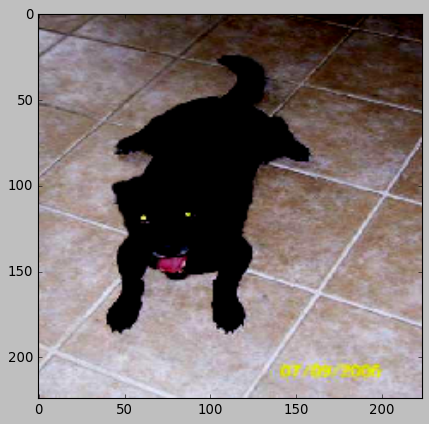

In [36]:
# Split the dataset
#split the array or matrices into random tran and test subset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
test_set = np.array(X_test);
len(test_set)
plt.imshow(X_test[2])

In [ ]:
## custom vgg model
# this for training the classifier 
img_input = Input(shape=(224,224,3));

In [ ]:
#in case of DenseNet121 use this cell
model = DenseNet121(include_top=True, weights='imagenet', input_tensor= img_input);
last_layer = model.get_layer('fc1000').output 

In [ ]:
#in case of VGG16 use this cell
model = VGG16(include_top=True, weights='imagenet', input_tensor= img_input);
last_layer = model.get_layer('fc2').output #it's a second last later

In [ ]:
#in case of VGG19 use this
model = VGG19(input_tensor = img_input, include_top = True, weights = 'imagenet');
last_layer = model.get_layer('fc2').output #it's a second last later

In [ ]:
#in case of MobileNetV2 
model = MobileNetV2(include_top=True, weights='imagenet', input_tensor= img_input);
last_layer = model.get_layer('global_average_pooling2d').output 

In [ ]:
#show structure
model.summary()

In [ ]:
#connected the customized layer with the last_layer
out = Dense(num_class, activation = 'softmax', name = 'output')(last_layer);

custom_model = Model(img_input, out);
custom_model.summary();

In [ ]:
##The models are trained in 4 different ways so select the cell to run
#1. only the lastlayer 
#2. whole network
#3. train all layer nut not the last 
#4. loaded the saved model and train the whole network once again

In [ ]:
#1. last layer
##only training the last layer
for layer in custom_model.layers[:-1]:
    layer.trainable = False

In [ ]:
#2. whole network
#train all layers
for layer in custom_model.layers:
    layer.trainable = True

In [ ]:
#3. train all layer but not the last 
#not trainging the last layer
custom_model = keras.models.load_model('VGG16_my_model.h5')
for layer in custom_vgg_model.layers:  
    layer.trainable  = True
for layer in custom_model.layers[:-1]:
    layer.trainable = False

In [27]:
#4. loaded the saved model and train the whole network once again
#Recalling the saved model and train all layer
custom_model = keras.models.load_model('VGG16_my_model.h5')
for layer in custom_model.layers:
    layer.trainable = True

In [28]:
custom_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()

hist = custom_model.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Train on 323 samples, validate on 81 samples
Epoch 1/4
323/323 [==============================] - 198s 611ms/sample - loss: 3081.1662 - accuracy: 0.5356 - val_loss: 33.2580 - val_accuracy: 0.5432
Epoch 2/4
323/323 [==============================] - 185s 573ms/sample - loss: 4.5185 - accuracy: 0.5232 - val_loss: 1.2968 - val_accuracy: 0.4568
Epoch 3/4
323/323 [==============================] - 184s 569ms/sample - loss: 0.8166 - accuracy: 0.5356 - val_loss: 0.7395 - val_accuracy: 0.4568
Epoch 4/4
323/323 [==============================] - 184s 570ms/sample - loss: 1.0655 - accuracy: 0.5108 - val_loss: 2.3254 - val_accuracy: 0.5432
Training time: -750.3934037685394
81/1 [===================================================================================================================================================================================================================================================================================================================================

In [ ]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(4)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
# test the model
# Save predictions for future checks
predictions = custom_model.predict(X_test)
#making it more visual
#plt.figure(figsize=(20,20))           
for i in range(len(X_test)):
    plt.subplot(9,9,i+1)   
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_set[i], cmap=plt.cm.binary) 
    for name in names:
        if predictions[i][0] > predictions[i][1]:
            plt.xlabel("Dog")
        else:
            plt.xlabel("Human")
        #plt.xlabel("\t%s [%f]" %(name, predictions[i][0]))
        #plt.xlabel("\t%s [%f]" %(name, predictions[i][1]))
        #t=t+1
plt.show()

In [24]:
# Save the model
custom_model.save('VGG16_my_model.h5')